In [613]:
# importing python data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [614]:
# reading data from loan.csv
data = pd.read_csv("data/loan.csv")

/tmp/ipykernel_10478/3710447180.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/loan.csv")


In [615]:
# getting original shape of data. The data contains 39717 rows and 111 columns
data.shape

(39717, 111)

## Data Cleaning


For data cleaning process, first dropping columns that have all rows as Null.


In [616]:
# dropping Null columns
data.dropna(axis=1, how='all',inplace=True)

In [617]:
# getting number of non null columns that are left after dropping Null columns
data.shape[1]

57

In [618]:
# getting remaining column names
data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_

After removing the null columns, checking the unique values in each remaining columns to see the effectiveness of columns. High number of unique 
values generally means that column is either less effective or binning/clustering is required

In [619]:
# getting unique values in each column
for col in data.columns.values:
    print(col + ": " +str(data[col].unique().size))

id: 39717
member_id: 39717
loan_amnt: 885
funded_amnt: 1041
funded_amnt_inv: 8205
term: 2
int_rate: 371
installment: 15383
grade: 7
sub_grade: 35
emp_title: 28821
emp_length: 12
home_ownership: 5
annual_inc: 5318
verification_status: 3
issue_d: 55
loan_status: 3
pymnt_plan: 1
url: 39717
desc: 26528
purpose: 14
title: 19616
zip_code: 823
addr_state: 50
dti: 2868
delinq_2yrs: 11
earliest_cr_line: 526
inq_last_6mths: 9
mths_since_last_delinq: 96
mths_since_last_record: 112
open_acc: 40
pub_rec: 5
revol_bal: 21711
revol_util: 1090
total_acc: 82
initial_list_status: 1
out_prncp: 1137
out_prncp_inv: 1138
total_pymnt: 37850
total_pymnt_inv: 37518
total_rec_prncp: 7976
total_rec_int: 35148
total_rec_late_fee: 1356
recoveries: 4040
collection_recovery_fee: 2616
last_pymnt_d: 102
last_pymnt_amnt: 34930
next_pymnt_d: 3
last_credit_pull_d: 107
collections_12_mths_ex_med: 2
policy_code: 1
application_type: 1
acc_now_delinq: 1
chargeoff_within_12_mths: 2
delinq_amnt: 1
pub_rec_bankruptcies: 4
tax_li

#### Columns Analysis

1. loan_status is the target value(56 columns left)

2. id, member_id,url,desc,title,emp_title,total_pymnt,total_pymnt_inv, have all/almost all unique values. With so much unique values, it's highly
unlikely that they will contribute to analysis. Hence, we can drop them.

3. acc_now_delinq,delinq_amnt,pymnt_plan,initial_list_status,policy_code, application_type have only 1 unique value and hence will not help in getting any trend.Hence, we can drop them.

4. zip_code has too many zipcodes and not relevant to use case. Hence, we can drop them as well.

5. total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,last_pymnt_d,last_credit_pull_d does not make much sense as these are customer behavior variables. These columns are generated after the loan is given to borower. But we want to analyze the crietria for default for new customers.
Hence, we cna drop them.

6. next_pymnt_d has too many null values. Hence dropping this column. 
7. collections_12_mths_ex_med,tax_liens has max values 0 which will not help in alaysis. Hence dropping this column as well																															

In [620]:
# dropping above columns which are not required
data.drop(["id","member_id","url","desc","title","emp_title","total_pymnt","total_pymnt_inv"],inplace=True,axis=1)
data.drop(["acc_now_delinq","delinq_amnt","pymnt_plan","initial_list_status","policy_code","application_type","zip_code",
           "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt",
           "next_pymnt_d","collections_12_mths_ex_med","tax_liens"],inplace=True,axis=1)
data.drop(["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","last_pymnt_d",
           "last_credit_pull_d"],inplace=True,axis=1)

In [621]:
# getting shape of remaining dataframe
data.shape

(39717, 21)

In [622]:
# getting remaining column names
data.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti',
       'mths_since_last_delinq', 'mths_since_last_record',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies'], dtype=object)

Now next step is to analyze the remaining columns and see the number of Null values/missing values in each column.

In [623]:
# getting null values in each column
for col in data.columns.values:
    print(col + ": " +str(data[col].isnull().sum()))

loan_amnt: 0
funded_amnt: 0
funded_amnt_inv: 0
term: 0
int_rate: 0
installment: 0
grade: 0
sub_grade: 0
emp_length: 1075
home_ownership: 0
annual_inc: 0
verification_status: 0
issue_d: 0
loan_status: 0
purpose: 0
addr_state: 0
dti: 0
mths_since_last_delinq: 25682
mths_since_last_record: 36931
chargeoff_within_12_mths: 56
pub_rec_bankruptcies: 697


In [624]:
# mths_since_last_delinq and mths_since_last_record have very large amount of null values hence we can drop them.
data.drop(["mths_since_last_delinq", "mths_since_last_record"],inplace=True,axis=1)

dropping rows with loan_status "current" as we want to get insights on new customers and this class is for current customers.

In [625]:
# dropping rows with loan_status "current" as we want to get insights on new customers and this class is for current customers.
data = data[~(data["loan_status"] == "Current")]

## Data Analysis

Analyzing pub_rec_bankruptcies column. 
Definition: Number of public record bankruptcies.This provides information on the number of times borower announced bankruptcy.

In [626]:
# pub_rec_bankruptcies column unique values
data["pub_rec_bankruptcies"].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


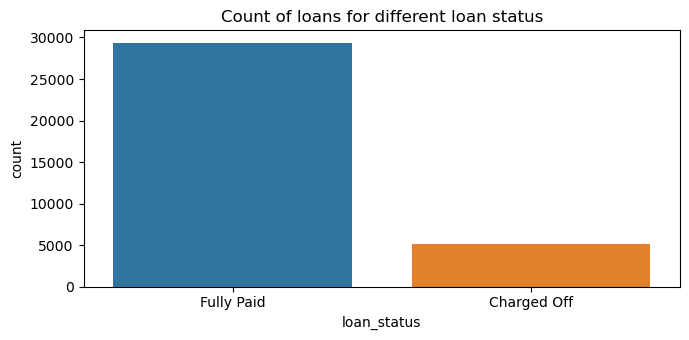

In [693]:
# getting distribution for number of loan_status
sns.countplot(x=data["loan_status"])
plt.title("Count of loans for different loan status")
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


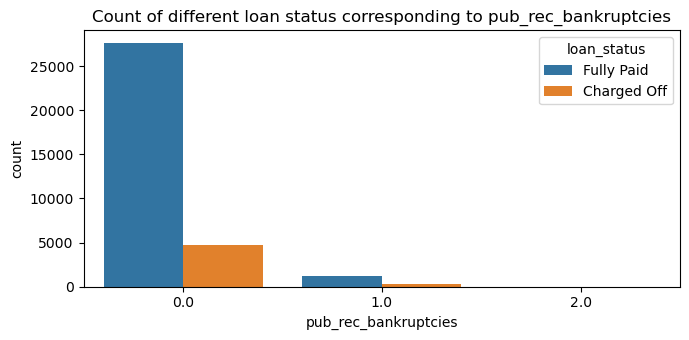

In [694]:
# getting distribution for loan_status and pub_rec_bankruptcies
sns.countplot(data=data, x="pub_rec_bankruptcies", hue="loan_status")
plt.title("Count of different loan status corresponding to pub_rec_bankruptcies")
plt.show()

In [642]:
# calculating percentage of charged off loans
for i in range(0,3):
    num = data[(data["pub_rec_bankruptcies"]== i) & (data["loan_status"]=="Charged Off")].shape[0]
    denom = data[(data["pub_rec_bankruptcies"]== i)].shape[0]
    per_of_charged_off = (num/denom) *100
    print("Percentage of charged off loans for borrowers with " + str(i) +" pub_rec_bankruptcies is: " + str(per_of_charged_off) +"%")

Percentage of charged off loans for borrowers with 0 pub_rec_bankruptcies is: 14.186765274021745%
Percentage of charged off loans for borrowers with 1 pub_rec_bankruptcies is: 22.35797189981674%
Percentage of charged off loans for borrowers with 2 pub_rec_bankruptcies is: 40.0%


=====================

As the charged off loans percentage increases around 8% when pub_rec_bankruptcies were 1 and reached around 40% when number of pub_rec_bankruptcies
equals 2, hence investors should be more cautious in giving loans to these borrowers with more pub_rec_bankruptcies.

Now checking for unique values and corresponding sum in column "chargeoff_within_12_mths"

In [644]:
# checking for unique values and corresponding value_counts for chargeoff_within_12_mths column
print(data["chargeoff_within_12_mths"].value_counts())

0.0    38521
Name: chargeoff_within_12_mths, dtype: int64


In [645]:
# As the column "chargeoff_within_12_mths" has only values as 0.0, hence we can drop this column as well.
data.drop(["chargeoff_within_12_mths"],axis=1,inplace=True)

In [646]:
# installing squarify library for using tree map.
! pip install squarify

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


Now analyzing addr_state column. 
Definition: The state provided by the borrower in the loan application
Analyzing this column will provide insignts on the geograpghy of borowwers and if the state has any role to play in being default.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


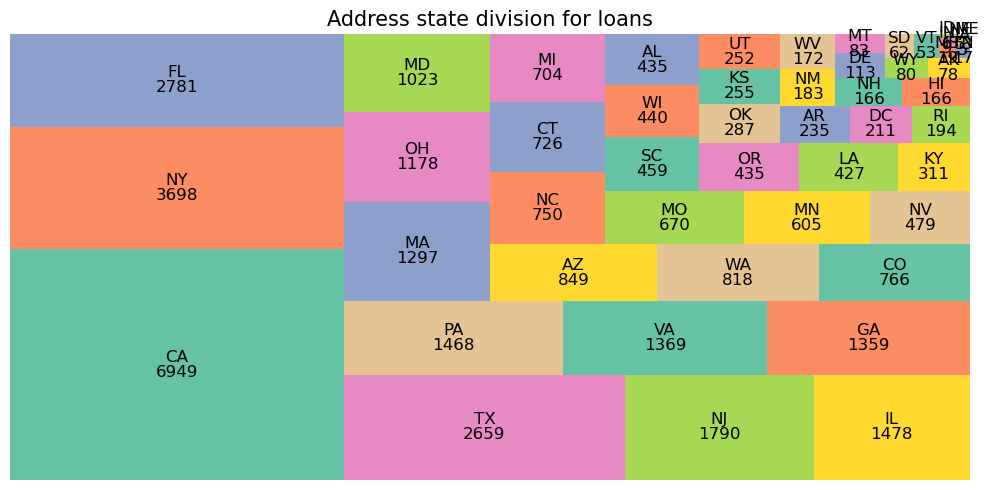

In [647]:
# checking for unique values and corresponding value_counts for addr_state column and creating squarify plot by importing squarify from pip
import squarify

addr_count=data["addr_state"].value_counts()
addr_tuple = [tuple((x, y)) for x, y in addr_count.items()]
State = []
Count = []
for tuples,count in addr_tuple:
    State.append(tuples)
    Count.append(count)
    
plt.figure(figsize=(10,5))
squarify.plot(sizes=Count, label=State, value=Count,
              color=[matplotlib.cm.Set2(i) for i in range(7)],
              text_kwargs={'fontsize': 12})
plt.title('Address state division for loans', fontsize=15)
plt.axis('off')
plt.show()


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


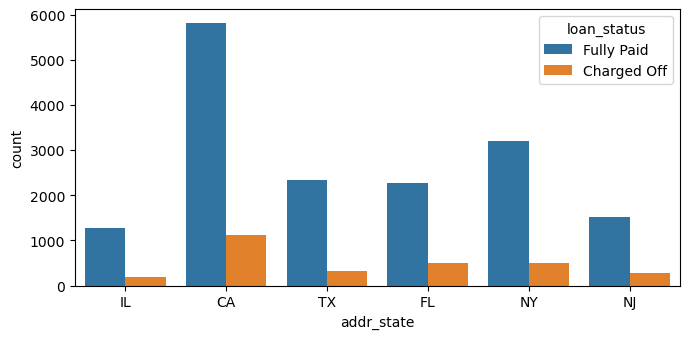

In [648]:
# looking at above tree map, 50% of the total customers come from CA,NY,FL,TX,NJ and IL.
# creating a count plot with above 6 states to understand any pattern in states with loan_status.

six_states_list = ["CA","NY","FL","TX","NJ","IL"]
six_states=data[(data["addr_state"].isin(six_states_list))]
sns.countplot(data=six_states, x="addr_state", hue="loan_status")
plt.show()

In [649]:
# Also getting percentage of fully paid loan_status for each state.
for state in six_states_list:
    numerator = six_states[(six_states["loan_status"]=="Fully Paid") & (six_states["addr_state"] == state)]["loan_status"].count()
    denominator = six_states[(six_states["addr_state"] == state)]["loan_status"].count()
    percentage = (numerator/denominator)*100
    print("state is: "+ state + " and percentage of fully paid loans is "+ str(percentage) + "%")

state is: CA and percentage of fully paid loans is 83.81062023312707%
state is: NY and percentage of fully paid loans is 86.6143861546782%
state is: FL and percentage of fully paid loans is 81.87702265372168%
state is: TX and percentage of fully paid loans is 88.11583301993231%
state is: NJ and percentage of fully paid loans is 84.46927374301676%
state is: IL and percentage of fully paid loans is 86.67117726657646%


=======================

Can see that the states does not make much difference in customers fully paying their loans. But, company can be bit more careful in examining 
customers in FL state as the percentage is lowest there and can ease out the process a bit in TX state as percentage is highest there

Analyzing term column.

Definition: The number of payments on the loan. Values are in months and can be either 36 or 60.

In [650]:
# getting count of unique values
data["term"].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


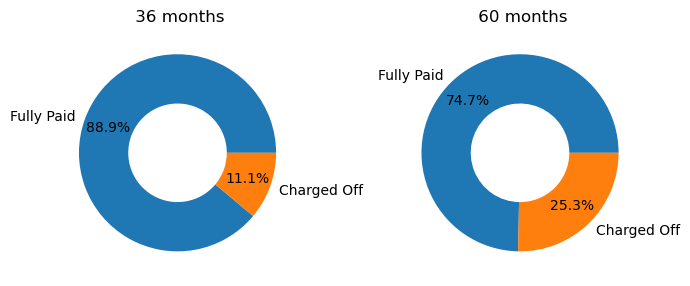

In [651]:
# we can see that the 3 year terms are almost 3 times the 5 year terms.
# calculating percentage for each term for better info.
# creating doughnut for each term in subplots

fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(7, 7))
termsAxis= [(" 36 months",ax1),(" 60 months",ax2)]
for term,axis in termsAxis:
    years = list(data[data["term"]== term]["loan_status"].value_counts())
    axis.pie(years,labels= ["Fully Paid","Charged Off"],autopct='%1.1f%%',pctdistance=0.75,wedgeprops=dict(width=.5))
    axis.set_title(term)
plt.show()

By looking at the above plots, we can see that 88.9% of the 3 year loans are fully paid and 74.9% of the 5 year loans are fully paid.
Hence, there company should focus more on verifying loans that are being taken for 5 years period as they tend to default more.

Analyzing home_ownership.

Definition: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [652]:
# checking feature home_ownership now
data["home_ownership"].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [653]:
# maximum borowwers are either living on rent or mortgage.
# The analyis is same as term feature
ownerships = list(data["home_ownership"].unique())
for ownership in ownerships:
    numerator = data[(data["loan_status"]=="Fully Paid") & (data["home_ownership"] == ownership)]["loan_status"].count()
    denominator = data[(data["home_ownership"] == ownership)]["loan_status"].count()
    percentage = (numerator/denominator)*100
    print("ownership is: "+ ownership + " and percentage of fully paid loans is "+ str(percentage) + "%")

ownership is: RENT and percentage of fully paid loans is 84.63744588744588%
ownership is: OWN and percentage of fully paid loans is 85.10924369747899%
ownership is: MORTGAGE and percentage of fully paid loans is 86.32865284060865%
ownership is: OTHER and percentage of fully paid loans is 81.63265306122449%
ownership is: NONE and percentage of fully paid loans is 100.0%


============

Looking above, home_ownership does not affect the loan_status much and hence does not provide any insight on defaults.

Analyzing loan_amnt, funded_amnt and funded_amnt_inv column.

1. loan_amnt definition: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
2. funded_amnt definition: The total amount committed to that loan at that point in time.
3. funded_amnt_inv definition: The total amount committed by investors for that loan at that point in time.

Loan amount is the amount asked by borrower. funded_amnt is the amount allowed by LC company. funded_amnt_inv is the amount allowed by investor.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


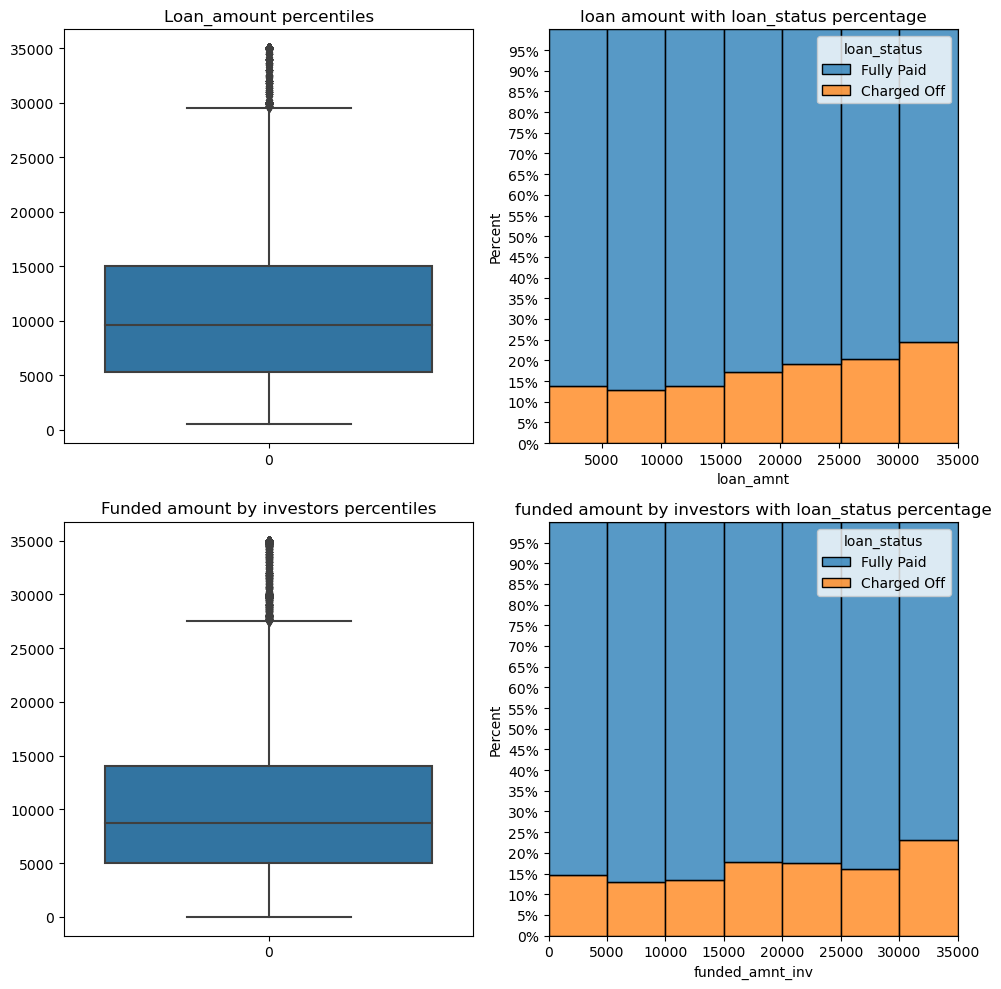

In [657]:
#analyzing loan_amnt
from matplotlib.ticker import PercentFormatter
fig,[[ax11,ax12],[ax21,ax22]] = plt.subplots(nrows=2,ncols=2, figsize=(10, 10))

# figure 1 with box plot for loan amount
sns.boxplot(data["loan_amnt"],ax=ax11)
ax11.set_title("Loan_amount percentiles")

# figure 2 with histogram for loan amount vs loan status
sns.histplot(data=data,x="loan_amnt",hue="loan_status",multiple="fill",bins=7,stat="percent",ax=ax12)
ax12.set_yticks(np.arange(0,1, 0.05))
ax12.yaxis.set_major_formatter(PercentFormatter(1))
ax12.set_title("loan amount with loan_status percentage")

# figure 3 with box plot for funded amount by investor
sns.boxplot(data["funded_amnt_inv"],ax=ax21)
ax21.set_title("Funded amount by investors percentiles")

# figure 4 with histogram for funded amount by investors vs loan status
sns.histplot(data=data,x="funded_amnt_inv",hue="loan_status",multiple="fill",bins=7,stat="percent",ax=ax22)
ax22.set_yticks(np.arange(0, 1, 0.05))
ax22.yaxis.set_major_formatter(PercentFormatter(1))
ax22.set_title("funded amount by investors with loan_status percentage")
plt.show()

1. Looking at figure 1, loan amount box-plot, the 25 percentile and 75 percentile is 5,000 and 15,000 respectively and mean is 10,000.
2. Figure 2 shows histogram for all percentage of loans that were "fully-paid" and "charged_off" for specific loan_amount. Percentage is around 15% till loan amount of 15,000 but the charged off percentage is incrementing regularly as the loan_amount increases beyond 15,000. Hence, company can make stricter rules for new customers asking for loans beyond 15,000.
3. For loan amount funded by investors, funded amount by investors beyond 15,000 have around 3-7% of higher risk of getting default.For funded amount by investors above 30,000, the charged off percentage increases drastically. Hence investors should focus more on giving loans above 30,000.

===============

Now creating 2 new columns named LCvsInv and LoanvsInv.
1. LCvsInv: Provides 2 values. "equal" if the funded_amnt = funded_amnt_inv and "greater" if funded_amnt > funded_amnt_inv
2. LoanvsInv: Provides 2 values. "equal" if the loan_amnt = funded_amnt_inv and "greater" if loan_amnt > funded_amnt_inv. "equal" value signifies that the investor trusts the borrower that they will pay out the loan successfully.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


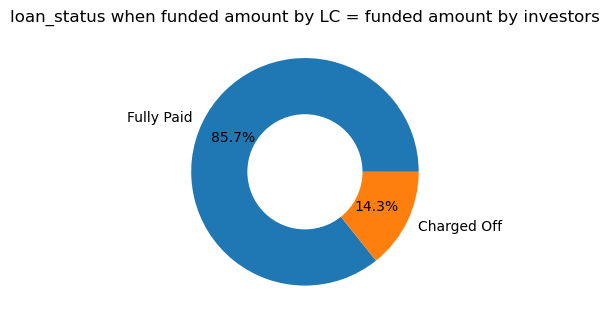

In [658]:
# creating a new column LCvsInv to compare funded_amnt vs funded_amnt_inv
conditions = [(data["funded_amnt"] > data["funded_amnt_inv"]),(data["funded_amnt"] == data["funded_amnt_inv"])]
choices =["greater","equal"]
data["LCvsInv"] = np.select(conditions,choices)

# now checking for LCvsInv vs loan_status.
plt.figure(figsize=(4,5))
equal = list(data[data["LCvsInv"]== "equal"]["loan_status"].value_counts())
plt.pie(equal,labels= ["Fully Paid","Charged Off"],autopct='%1.1f%%',pctdistance=0.7)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("loan_status when funded amount by LC = funded amount by investors")
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


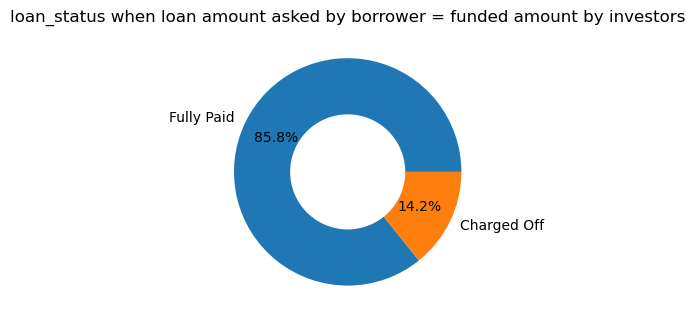

In [659]:
# creating a new column LoanvsInv to compare loan amount vs funded_amnt_inv
conditions = [(data["loan_amnt"] > data["funded_amnt_inv"]),(data["loan_amnt"] == data["funded_amnt_inv"])]
choices =["greater","equal"]
data["LoanvsInv"] = np.select(conditions,choices)

# now checking for LCvsInv vs loan_status.
plt.figure(figsize=(4,5))
equal = list(data[data["LoanvsInv"]== "equal"]["loan_status"].value_counts())
plt.pie(equal,labels= ["Fully Paid","Charged Off"],autopct='%1.1f%%',pctdistance=0.7)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("loan_status when loan amount asked by borrower = funded amount by investors")
plt.show()

This suggests that whenever investors have full faith on LC, 85.7% of the times, the loans are fully paid and whenever investors have full faith on borrower, 85.8% of the times, the loans are fully paid.

Now we need to see what factors are causing investors to believe the borrower completely.

====================

analyzing emp_length feature.

Definition: Employment length in years. Possible values are between 0 and 11 where 0 means less than one year and 10 means more than 10 years

In [660]:
# analyzing emp_length feature.
data["emp_length"].value_counts()

10+ years    8488
0            4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

##### Cleaning emp_length data for analysis

In [661]:
# removing years from emp_length
data["emp_length"]=data["emp_length"].str.replace("years","")

In [662]:
#replacing <1 year with 0 to generalize the feature into integer.
data["emp_length"]=data["emp_length"].str.replace("< 1 year","0")

In [669]:
# replacing 10+ to 11 to generalize the feature into integer.
data["emp_length"]=data["emp_length"].str.replace("10+","11")

/tmp/ipykernel_10478/421160269.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["emp_length"]=data["emp_length"].str.replace("+","")


In [671]:
# replacing 1 year to 1 generalize the feature into integer.
data["emp_length"]=data["emp_length"].str.replace("year","")

In [673]:
# converting object dtype to float
data["emp_length"].astype("float")

0        11.0
1         0.0
2        11.0
3        11.0
5         3.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 38577, dtype: float64

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


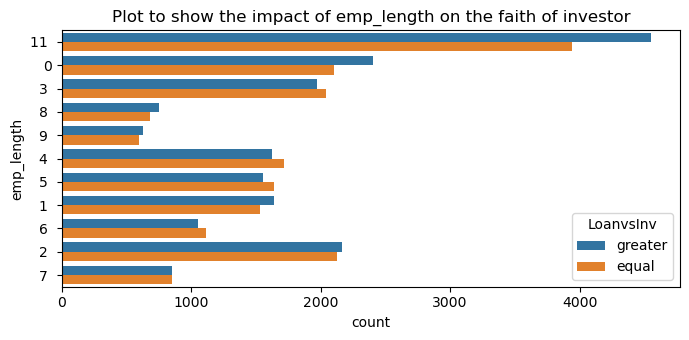

In [677]:
# creating a count plot to get the trend for employee experience vs feature LoanvsInv
sns.countplot(data=data, y="emp_length", hue="LoanvsInv")
plt.title( "Plot to show the impact of emp_length on the faith of investor")
plt.show()

Above graph shows that the investors don't much trust borrowers with <1 year of experience and 10+ years of experience.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


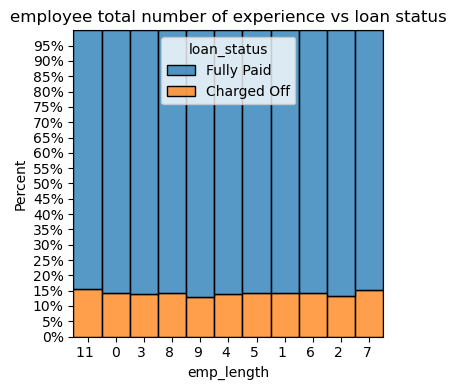

In [675]:
# Now we will see the percentage of loans that are fully paid or defaulted by 10+ years and <1 year.
fig,ax = plt.subplots(1,1,figsize=(4,4))
sns.histplot(data=data,x="emp_length",hue="loan_status",multiple="fill",bins=7,stat="percent",ax=ax)
plt.yticks(np.arange(0, 1, 0.05))
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.title("employee total number of experience vs loan status")
plt.show()

Looking at above graph, the charged off percentage is from 13%-16% for all emp_length hence emp_length does not make much of a difference.
But investors are allowing less amount loan to borrowers with emp_length 10+ years and <1 year which is causing loss in interest rates for investors and company.

Company can interact with the investors asking the pain points of investors not trusting borrowers with 10+ years and <1 year of experience.

===============

Now calculating the effect of interest rates on loan_status.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


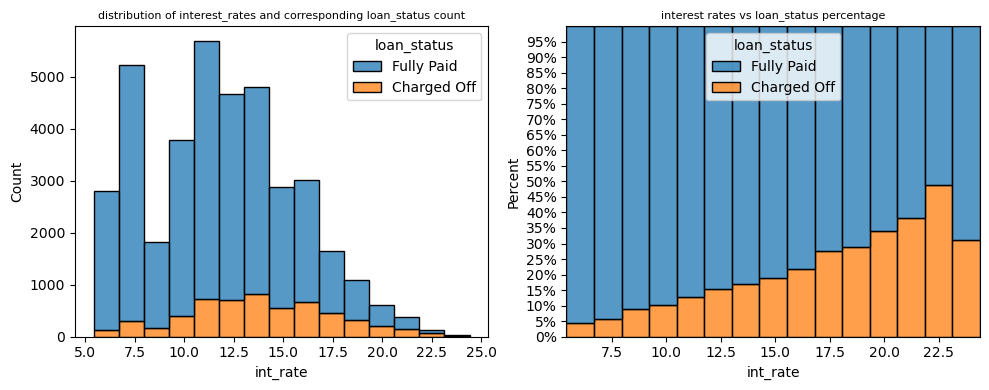

In [676]:
# For int_rate column, removing % sign and converting to float data type.
data["int_rate"]=data["int_rate"].str.replace("%","")
data["int_rate"]=data["int_rate"].astype("float")

# plotting 2 histograms to analyze interest rates with loan_status. 
#Fig 1 specifies the count of loans with interest rates.
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10, 4))
sns.histplot(data=data,x="int_rate",hue="loan_status",multiple="stack",bins=15,ax=ax1)
ax1.set_title("distribution of interest_rates and corresponding loan_status count",fontsize = 8)

# figure 2 shows the percentage of fully paid and charged off loans with different interest rates.
sns.histplot(data=data,x="int_rate",hue="loan_status",multiple="fill",bins=15,stat="percent",ax=ax2)
ax2.set_yticks(np.arange(0, 1, 0.05))
ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.set_title("interest rates vs loan_status percentage",fontsize = 8)

plt.show()

1. Looking above, maximum loans are taken at interest from 10% - 15% and also at rate 7.5%. 
2. The charged off percentage keep on increasing consistently as the interest rates increases.
3. Loans given at higher interest rates tend to default more and closes to around 50% at interest rate between 22-25%. In order to avoid defaults, the interest rates at which loan is provided should be less and more focus should be given to loans provided at interest rates above 17.5%

============

Checking for the impact of term feature on interest rate and loan_status.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


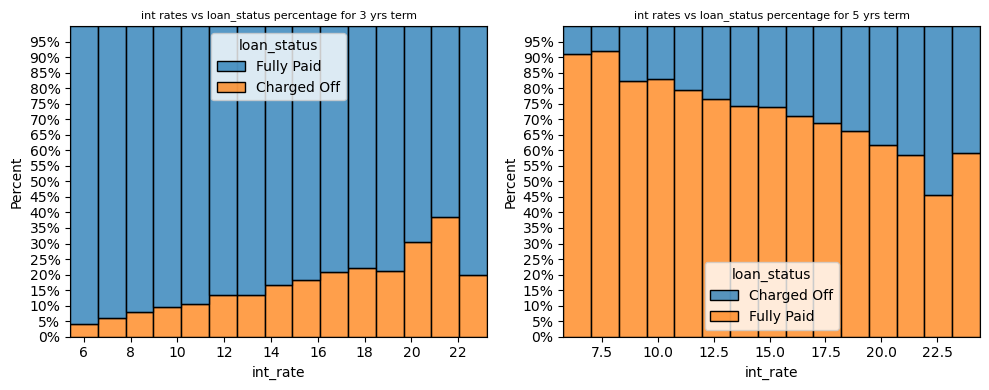

In [680]:
# the term offered at each interest rate resulting in fully_paid or charged_off.
term_3 = data[data["term"]==" 36 months"]
term_5= data[data["term"]==" 60 months"]

fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10, 4))

sns.histplot(data=term_3,x="int_rate",hue="loan_status",multiple="fill",bins=15,stat="percent",ax=ax1)
ax1.set_yticks(np.arange(0, 1, 0.05))
ax1.yaxis.set_major_formatter(PercentFormatter(1))
ax1.set_title("int rates vs loan_status percentage for 3 yrs term",fontsize = 8)

sns.histplot(data=term_5,x="int_rate",hue="loan_status",multiple="fill",bins=15,stat="percent",ax=ax2)
ax2.set_yticks(np.arange(0, 1, 0.05))
ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.set_title("int rates vs loan_status percentage for 5 yrs term",fontsize = 8)

plt.show()

1. From above graphs, we can see that the charged off rate is much higher (around 10% more) for 5 year term. Beyond 12.5% interest rate, the charged off rate is more than 25% which is considerably high. LC company and hence investors should refrain from providing loans at interest rates greater than 12.5% for 5 year term.
2. For 3 year term, LC and hence investors should refrain from providing loans at int rates greater than 20% for 3 year term as charged off rates is has increased drastically to 30%.

==============

Analyzing annual_inc feature.

Definition: The self-reported annual income provided by the borrower during registration.

In [684]:
# first converting the annual_income and funded_amnt to thousands by dividing by 1000.
data["annual_inc"] = data["annual_inc"].apply(lambda x: (x/1000))
data["funded_amnt_inv"] = data["funded_amnt_inv"].apply(lambda x: (x/1000))

# getting the 25 and 75 percentile.
data["annual_inc"].describe(percentiles=[.25,.5,.75,.9])

count    34577.000000
mean        56.965924
std         23.364211
min          4.000000
25%         39.552000
50%         54.300000
75%         73.000000
90%         90.697600
max        114.996000
Name: annual_inc, dtype: float64

In [682]:
# now removing all outliers
data = data[~(data["annual_inc"] >= 115)]

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


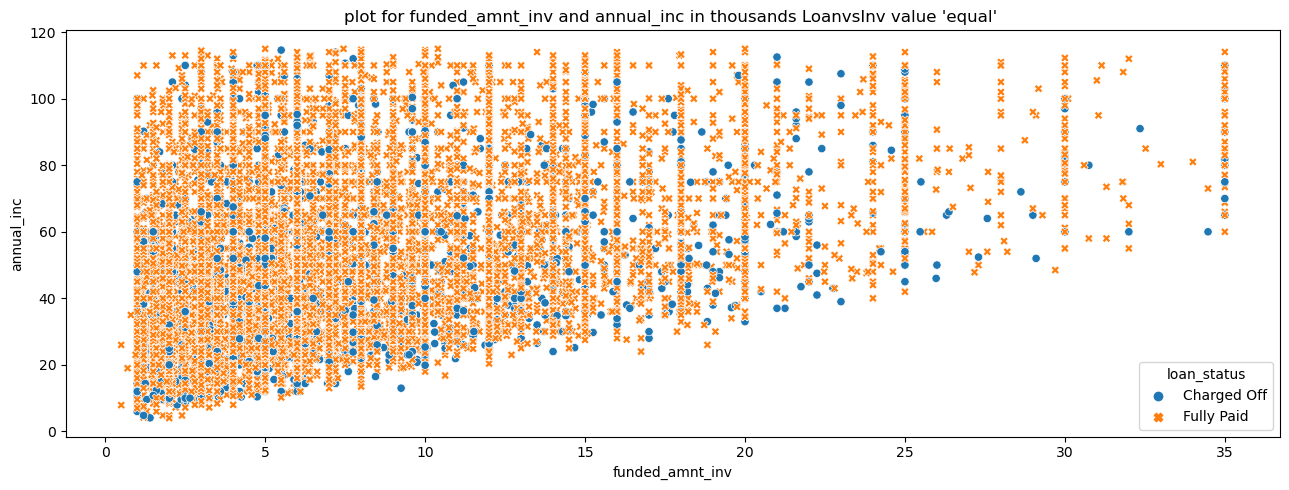

In [688]:
# now taking finding for "funded_amnt_inv" and "annual_inc" when (loan_amnt=funded_amnt_inv) and corresponding loan_status.
#data["annual_inc"] = data["annual_inc"].apply(lambda x: (x/1000))
#data["funded_amnt_inv"] = data["funded_amnt_inv"].apply(lambda x: (x/1000))
amnt_same = data[data["LoanvsInv"]=="equal"]

plt.figure(figsize=(13,5))
sns.scatterplot(data=amnt_same,y="annual_inc",x= "funded_amnt_inv",hue="loan_status",style="loan_status")
plt.title("plot for funded_amnt_inv and annual_inc in thousands LoanvsInv value 'equal' ")
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


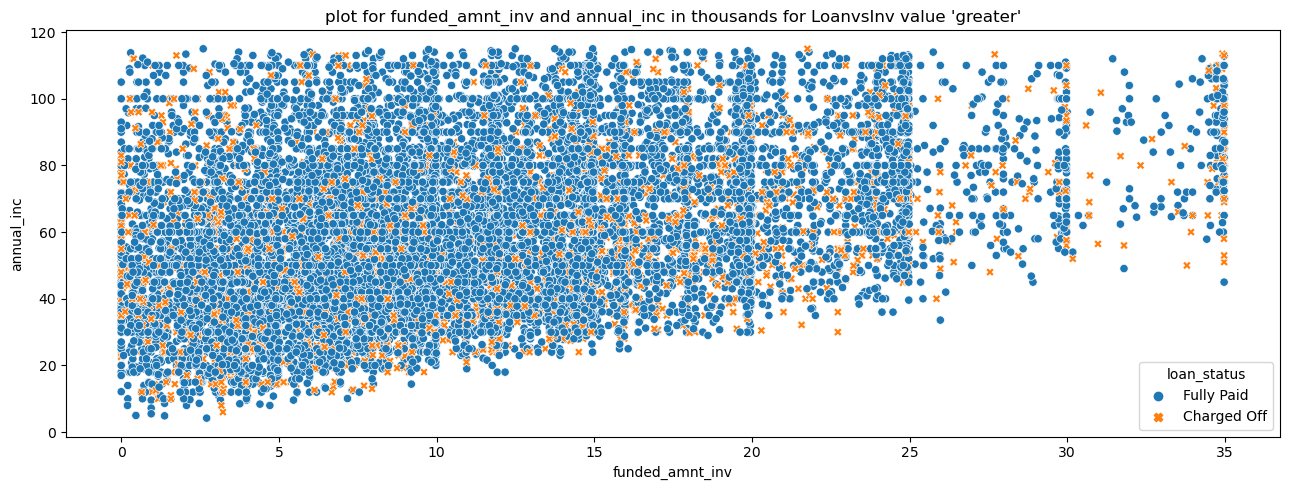

In [687]:
amnt_diff = data[data["LoanvsInv"]=="greater"]

plt.figure(figsize=(13,5))
sns.scatterplot(data=amnt_diff,y="annual_inc",x= "funded_amnt_inv",hue="loan_status",style="loan_status")
plt.title("plot for funded_amnt_inv and annual_inc in thousands for LoanvsInv value 'greater'")
plt.show()

Looking above, investors tend to allow less investment to borrower above loan amount 20k but default rate does not make much of a difference.

=================

Analyzing grade and sub_grades feature.

Definition:
1. grade: LC assigned loan grade.
2. sub_grades: LC assigned loan subgrade.

A grade is better than B, B is better than C and so on. A grade means that the loan is less volatile and have less risk. Hence, interest rates are less.

[+] https://www.lendingclub.com/foliofn/rateDetail.action

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


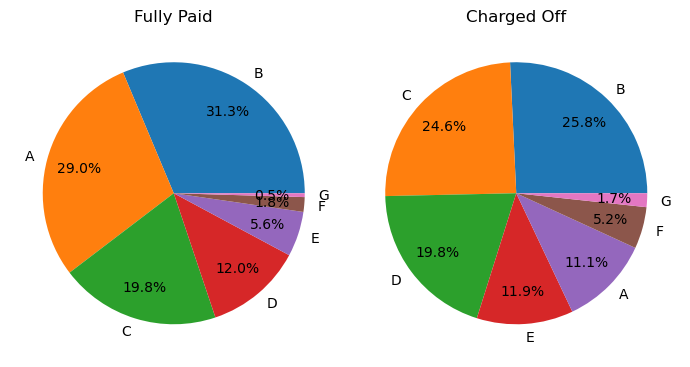

In [696]:
# analyzing grades with loan_status

fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(7, 10))

gradesF = list(data[data["loan_status"]== "Fully Paid"]["grade"].value_counts())
ax1.pie(gradesF,labels= ["B","A","C","D","E","F","G"],autopct='%1.1f%%',pctdistance=0.75)
ax1.set_title("Fully Paid")

gradesC = list(data[data["loan_status"]== "Charged Off"]["grade"].value_counts())
ax2.pie(gradesC,labels= ["B","C","D","E","A","F","G"],autopct='%1.1f%%',pctdistance=0.75)
ax2.set_title("Charged Off")

plt.show()

Out of all charged off loans, B,C and D grade loans are getting charged off mostly with 25.8%, 24.6% and 19.8% respectively.

Now calculating the subgrades of grades B,C and D having most charged off percentage.

In [690]:
# installing pywaffle library to get waffle plot.
! pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


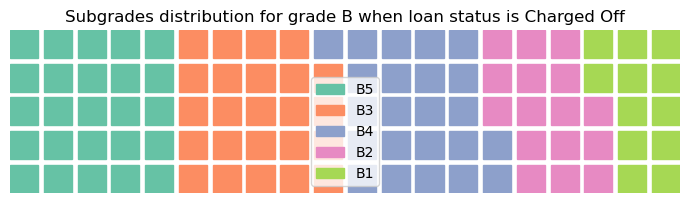

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


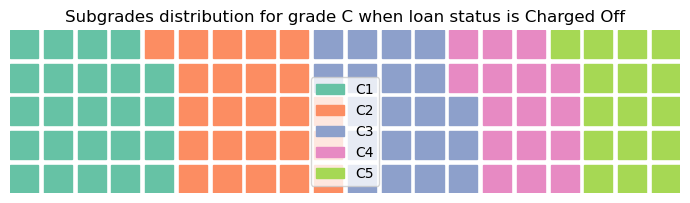

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


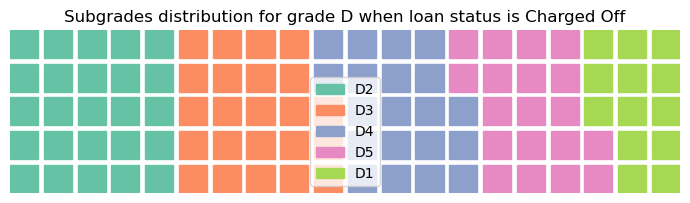

In [691]:
from pywaffle import Waffle

# to plot waffle chart for B grade and corresponding B subgrades with loan_status Charged Off
indexB = data[(data["grade"]=="B") & (data["loan_status"]=="Charged Off")]["sub_grade"].value_counts().index.tolist()
valuesB = data[(data["grade"]=="B") & (data["loan_status"]=="Charged Off")]["sub_grade"].value_counts().values.tolist()
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    columns=20,
    values = valuesB,
    labels = indexB
)
plt.title("Subgrades distribution for grade B when loan status is Charged Off")
plt.show()

# to plot waffle chart for C grade and corresponding C subgrades with loan_status Charged Off
indexC = data[(data["grade"]=="C") & (data["loan_status"]=="Charged Off")]["sub_grade"].value_counts().index.tolist()
valuesC = data[(data["grade"]=="C") & (data["loan_status"]=="Charged Off")]["sub_grade"].value_counts().values.tolist()

fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    columns=20,
    values = valuesC,
    labels = indexC
)
plt.title("Subgrades distribution for grade C when loan status is Charged Off")
plt.show()

# # to plot waffle chart for D grade and corresponding D subgrades with loan_status Charged Off
indexD = data[(data["grade"]=="D") & (data["loan_status"]=="Charged Off")]["sub_grade"].value_counts().index.tolist()
valuesD = data[(data["grade"]=="D") & (data["loan_status"]=="Charged Off")]["sub_grade"].value_counts().values.tolist()

fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    columns=20,
    values = valuesD,
    labels = indexD
)
plt.title("Subgrades distribution for grade D when loan status is Charged Off")
plt.show()

Above plots shows that 
1. In B grade, B5,B3 and B4 grades are resulting in more charged Off loans.
2. In C grade, C1,C2 and C3 are resulting in more charged Off loans.
3. In D grade, D2 and D3 are resulting in more charged Off loans.

================================

## Recommendations

1. As the charged off loans percentage increases around 8% when pub_rec_bankruptcies were 1 and reached around 40% when number of pub_rec_bankruptcies
equals 2, hence investors should be more cautious in giving loans to these borrowers with more pub_rec_bankruptcies.

2. The state of borrower does not make much difference in fully paying their loans. But, company can be bit more careful in examining 
customers in FL state as the percentage of Charged Off loans is highest there and can ease out the loan process a bit in TX state as percentage is lowest there.

3. 88.9% of the 3 year loans are fully paid and 74.9% of the 5 year loans are fully paid.
Hence, the company should focus more on verifying loans that are being taken for 5 years period as they tend to default more.

4. For loan amount funded by investors, funded amount by investors beyond 15,000 have around 3-7% of higher risk of getting default.For funded amount by investors above 30,000, the charged off percentage increases drastically. Hence investors should focus more on giving loans above amount 30,000.

5. The charged off percentage is from 13%-16% for all emp_length hence emp_length does not make much of a difference.
But investors are allowing less amount loan to borrowers with emp_length 10+ years and <1 year which is causing loss in interest rates for investors and company. Company can interact with the investors asking the pain points of investors not trusting borrowers with 10+ years and <1 year of experience.

6. Loans given at higher interest rates tend to default more and closes to around 50% at interest rate between 22-25%. In order to avoid defaults, the interest rates at which loan is provided should be less and more focus (background checks, other parameters) should be given to loans provided at interest rates above 17.5%.

7. Charged off rate is much higher (around 10% more) for 5 year term than 3 year term. Beyond 12.5% interest rate, the charged off rate is more than 25% for 5 term loans which is considerably high. LC company and hence investors should refrain from providing loans at interest rates greater than 12.5% for 5 year term.
For 3 year term, LC and investors should refrain from providing loans at interest rates greater than 20% as charged off rates has increased drastically to 30%.

8. Out of all charged off loans, B,C and D grade loans are getting charged off mostly with 25.8%, 24.6% and 19.8% respectively.

 8.1. In B grade, B5,B3 and B4 grades are resulting in more charged Off loans.
 
 8.2. In C grade, C1,C2 and C3 are resulting in more charged Off loans.
 
 8.3. In D grade, D2 and D3 are resulting in more charged Off loans.
 
 LC company can deep dive more on the reasons for defaults for these sub groups.
